# Mini Case 2 - FNCE4425 Financial Applications of Machine Learning

This assignment was designed to introduce us to clustering via K-means and other algorithms. The dataset provided was a cross section of financial ratios and data for various companies which included almost 7000 rows of data, with about 100 variables including a flag for whether or not the company had gone bankrupt or not represented as a binary value with '1' for bankrupt. There were ~220 companies that had the bankrupt flag of '1'.  

## Task and Restrictions
We were tasked with choosing between 5-10 of the variables available to cluster the data into 2 groups with the goal of minimizing the Davies Bouldin Index (DBI) via the Cluster Distance Performance module in AI Studio, formerly known as Rapid Miner. Additionally the Bankrupt flag was required to be set as 'label' as to prevent the algorithims from using it in its calculations, as this column was essentially the 'Answer'. DBI was the sole focus of this assignment, with instructions not to focus on high accuracy given the 'relative complexity of the problem'. 

# Step One

Knowing the size of the dataset and the variety of combinations of variables I had at my disposal, I opted to lean on my experiences in previous classes such as Python Programming Fundamentals and Predictive Analytics. 

I decided to use Sklearn to design a Decision Tree and KNN models to help determine which variables had the strongest relationships with the variable of interest: Bankruptcy. I used Chat GPT to create a quick framework, and then spent some time reviewing the code and applying fixes where necessary as LLM are prone to making errors. I then used .intersect() to determine the overlap of the features from each output and used that as a starting point for modeling in AI Studio. 

In [ ]:
#imports and data
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import os

file = "E:/~Documents/NAIT ONEDRIVE/OneDrive - NAIT/FNCE4425/Mini Case 2/Mini02-data.csv"


#Load dataset
df = pd.read_csv(file)
#check load
df.head()


In [ ]:
# Define features (x) and target (y)
x = df.drop(columns=['Bankrupt'])  # Exclude dependent variable
y = df['Bankrupt']

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=123)
clf.fit(x, y)

# Get feature importance
importance = clf.feature_importances_

# Select top 10 features
top_features = x.columns[importance.argsort()[::-1][:10]]
dtoutput = x.columns[importance.argsort()[::-1][:10]]
print("Top 10 Features:", top_features)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(x, y)

# Select top 10 features

top_features = x.columns[mi_scores.argsort()[::-1][:10]]
knnoutput = x.columns[mi_scores.argsort()[::-1][:10]]
print("Top 10 Features:", top_features)


In [ ]:
features = dtoutput.intersection(knnoutput)
print(features)

# Step 2
Using the data from Python I designed the AI Studio workflow to run K-means and X-means clustering within the parameters specified by the instructions: 

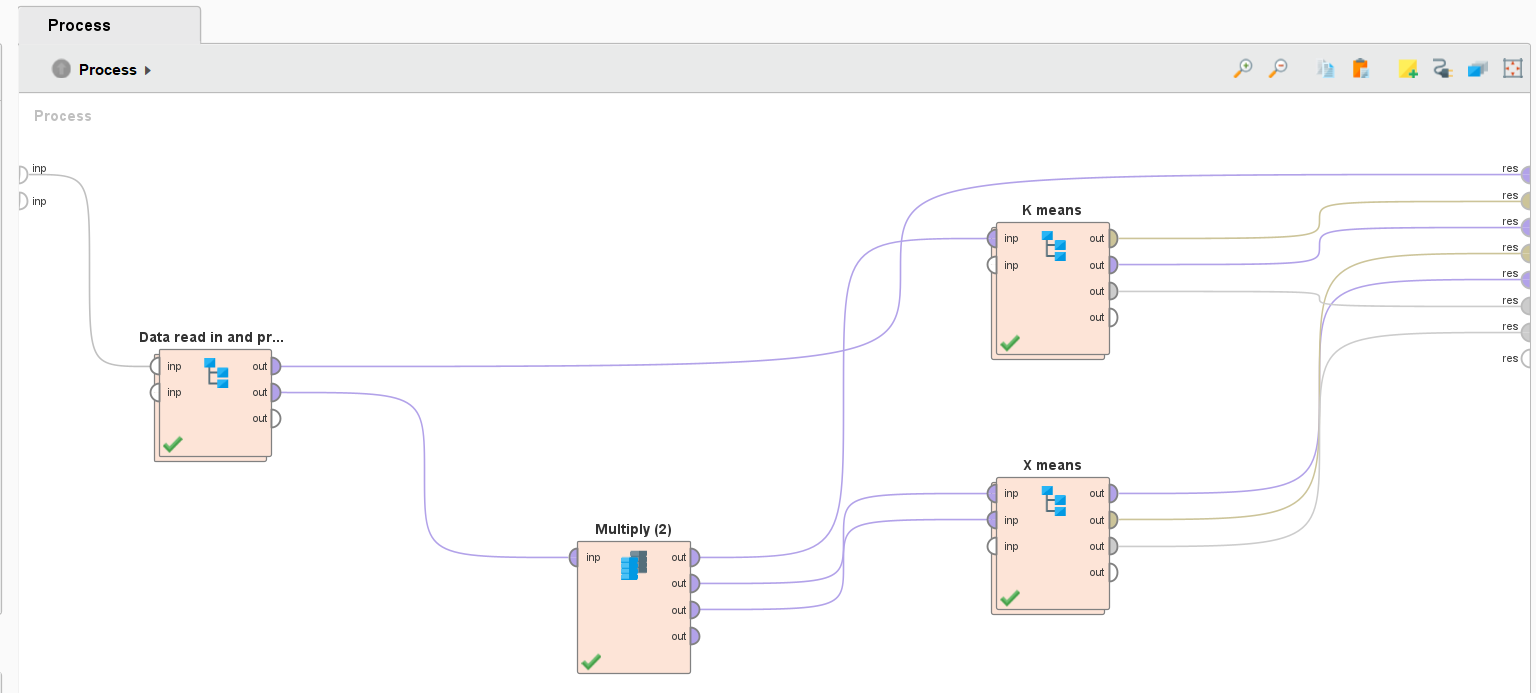

Below is the subprocess for the data read in:

First the data is read into the program and the role of 'label' is assigned to the Bankruptcy Column.
The Following Filter is used to drop any rows which are missing data, but to my knowledge the dataset is complete, so this does not alter the output. 
Next the output is split and sent to various Select Attribute modules each with their own subset of variables as defined by the note. 

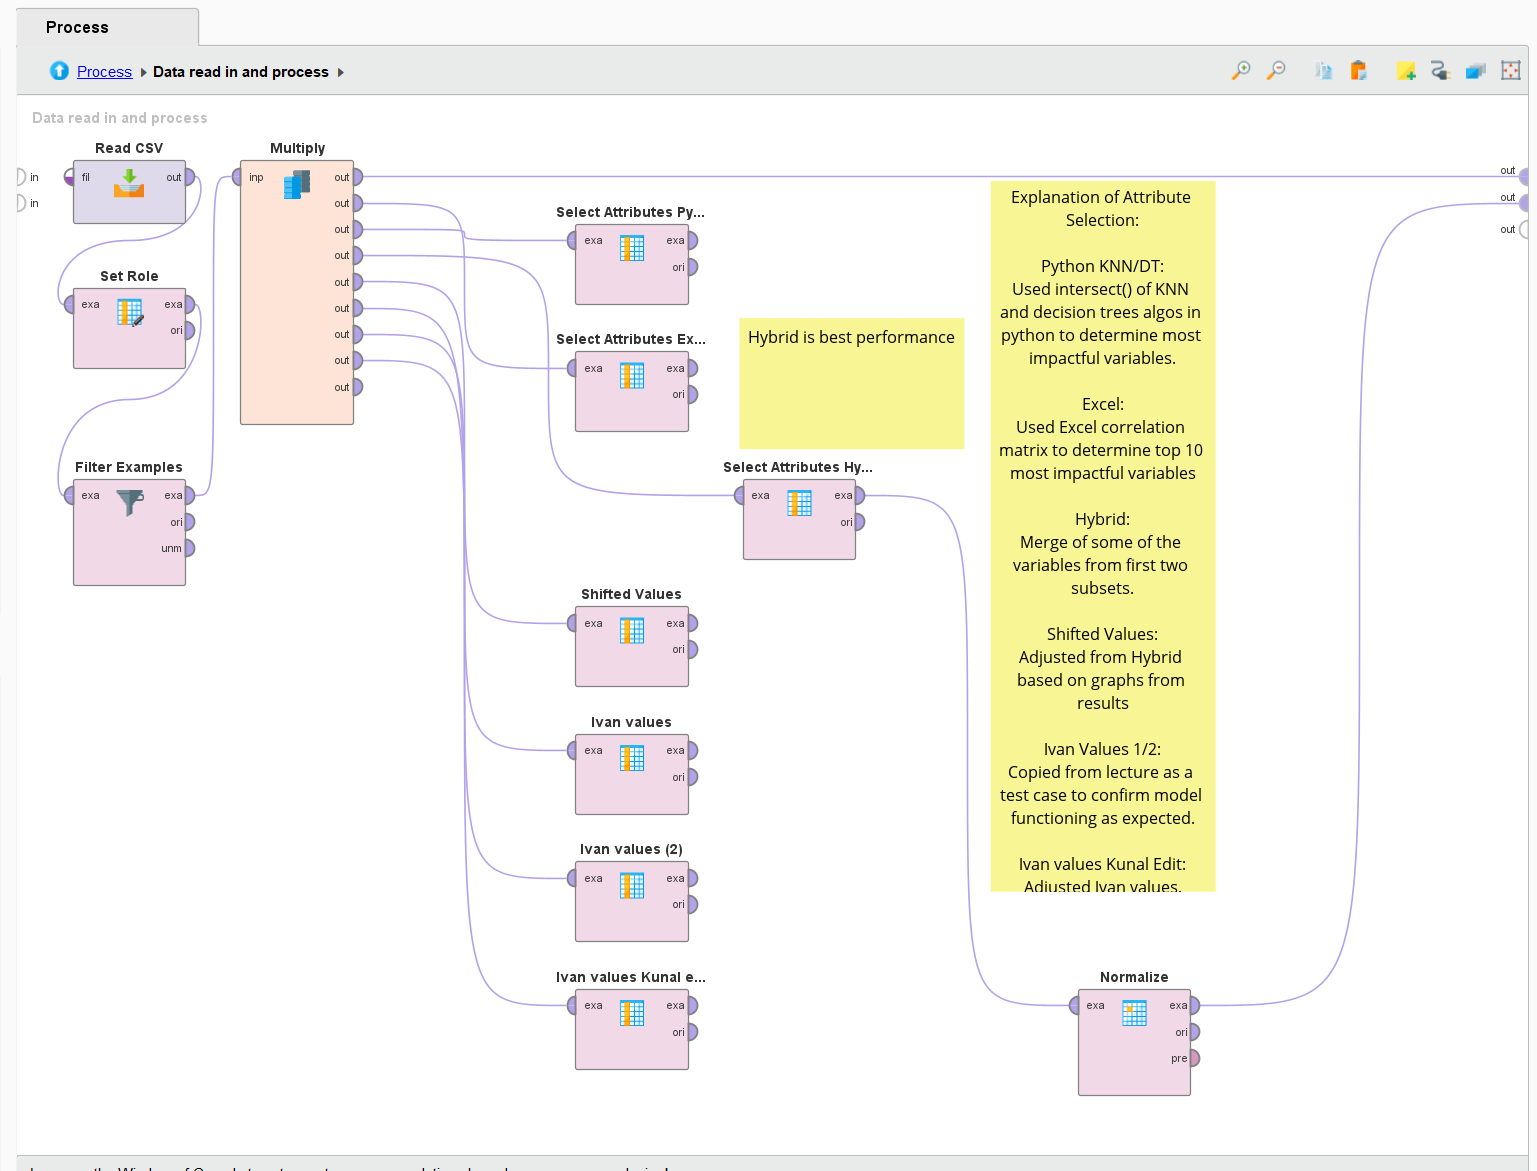

The initial results of K means from the python derived variables was as follows:  
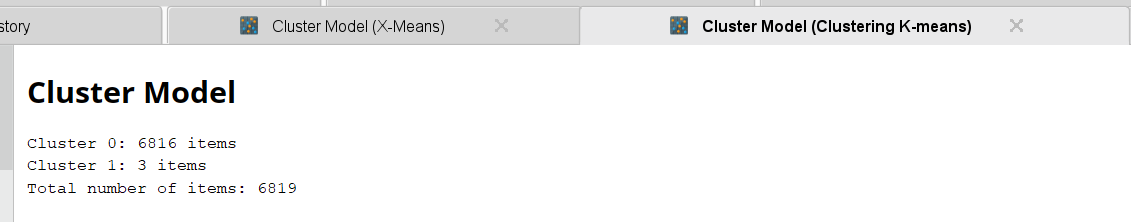
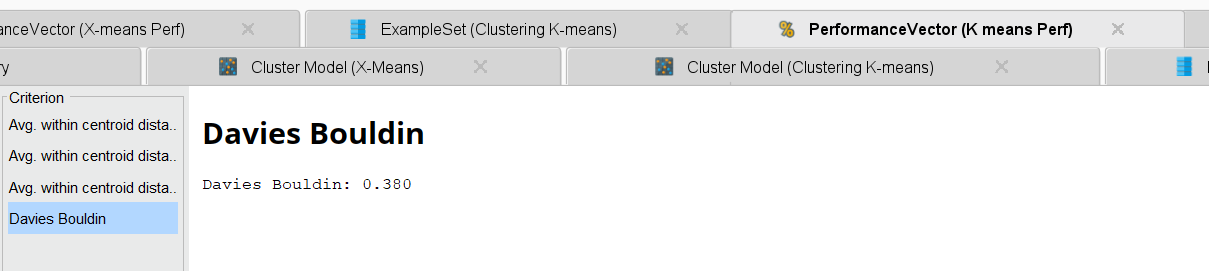  

x-means results:  
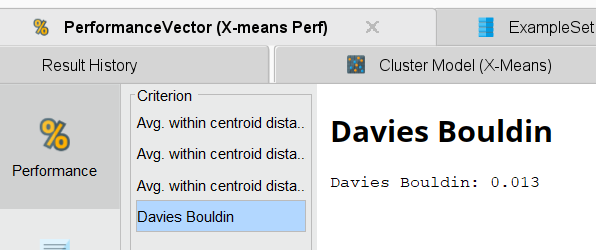
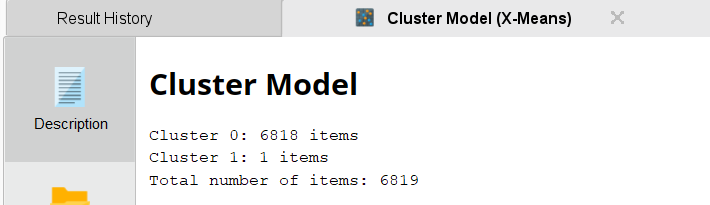


# Step 3:
I then decided to try a different approach, using Excel to generate a correlation matrix and index-match to determine the top 10 most heavily correlated values. 
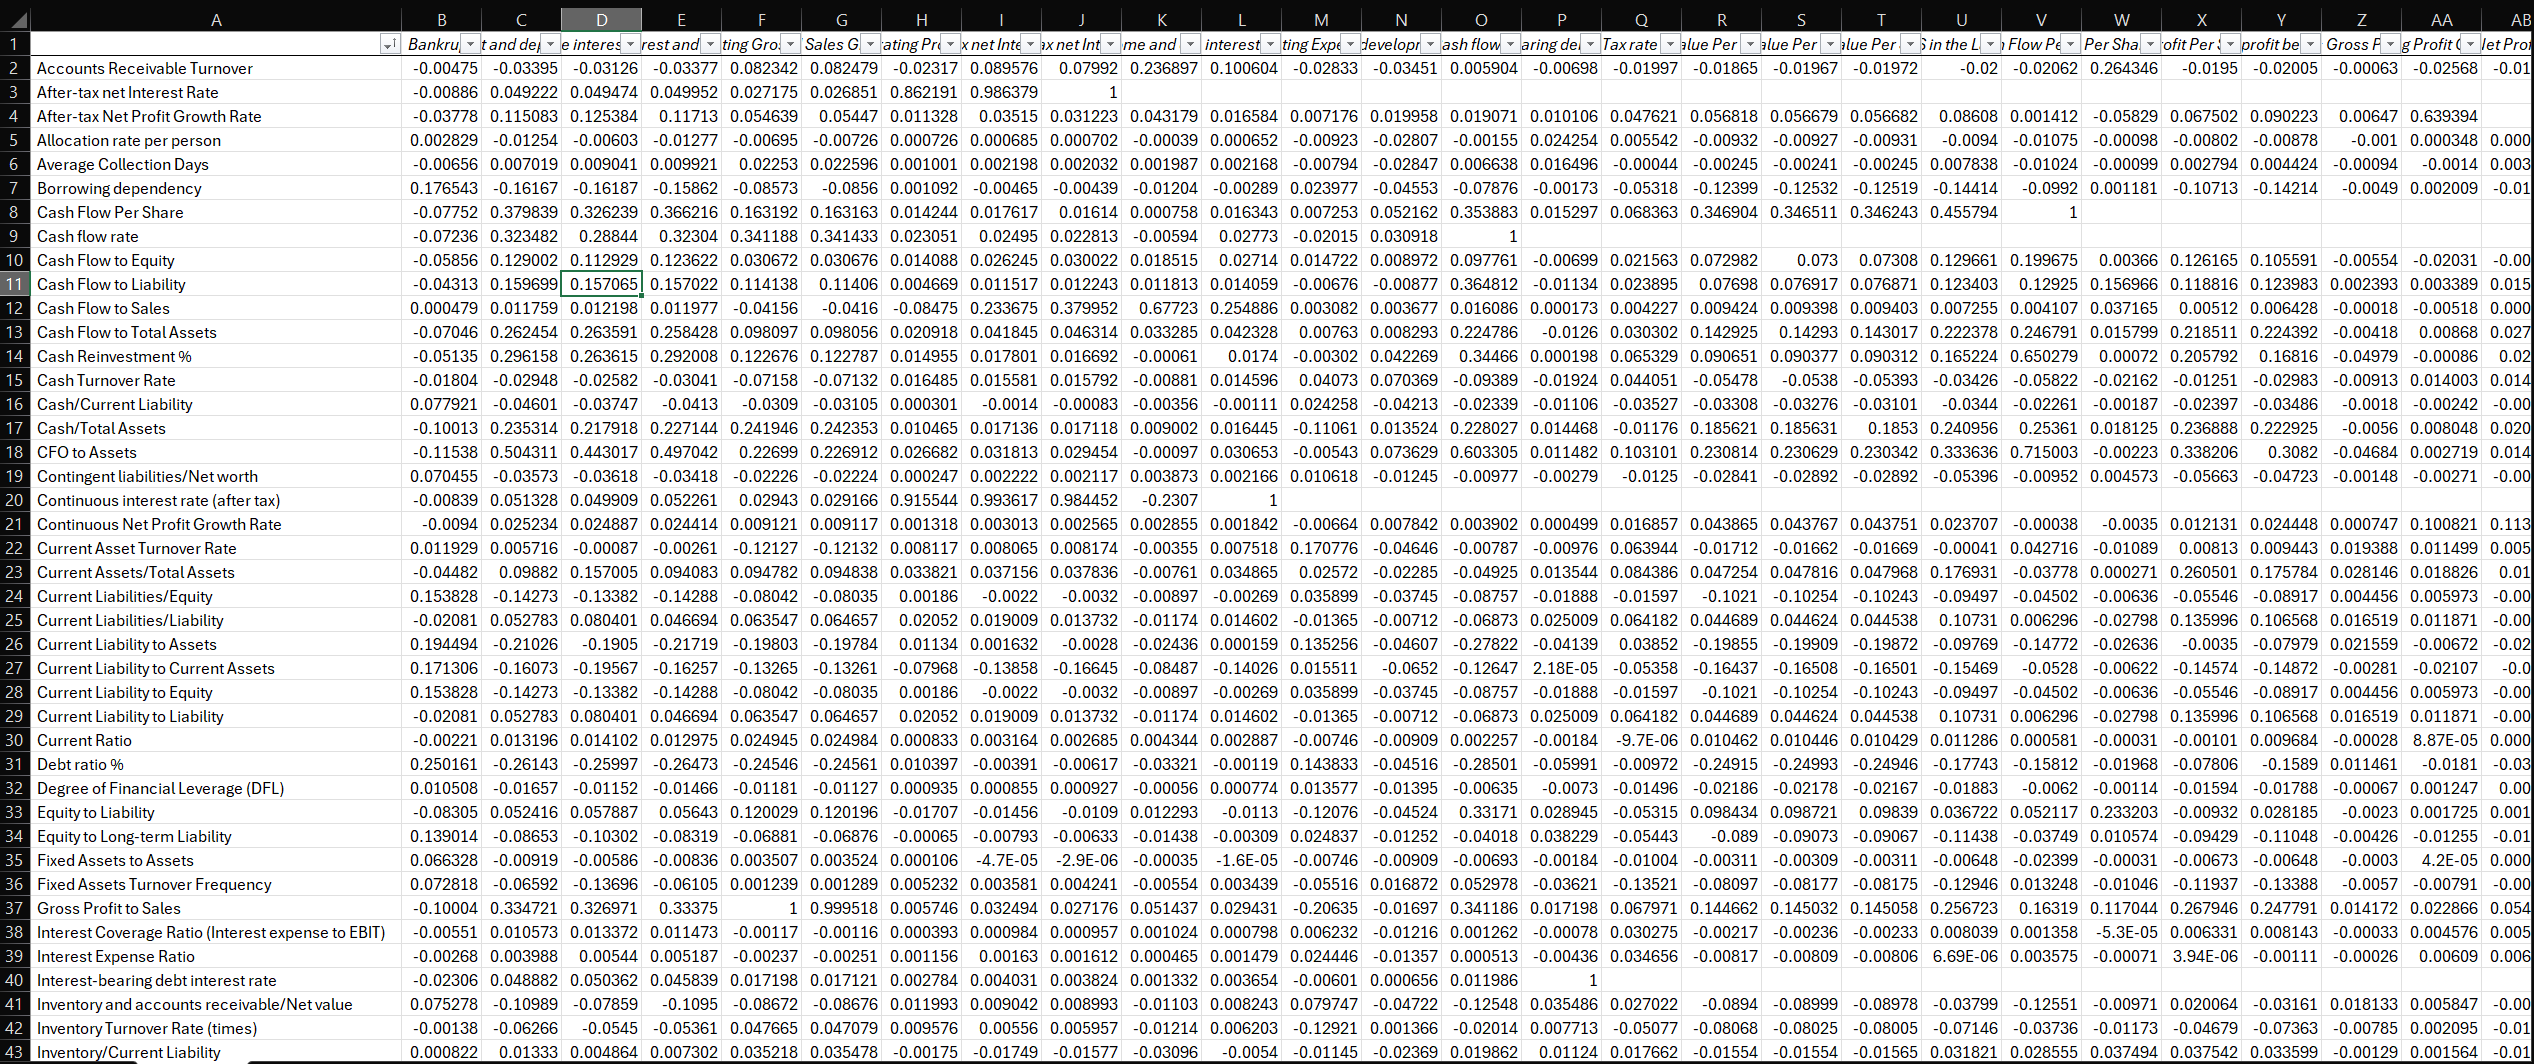
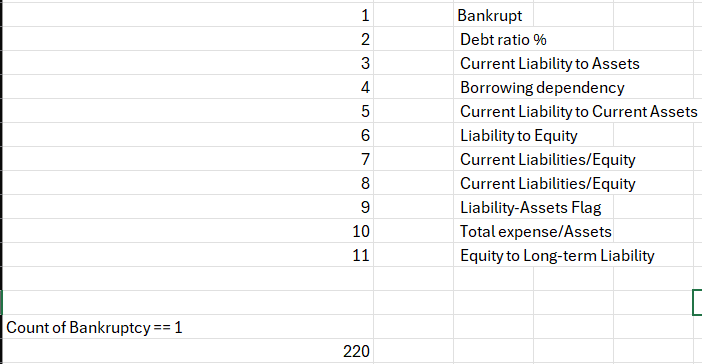


This yielded the following results:  

K-means:  
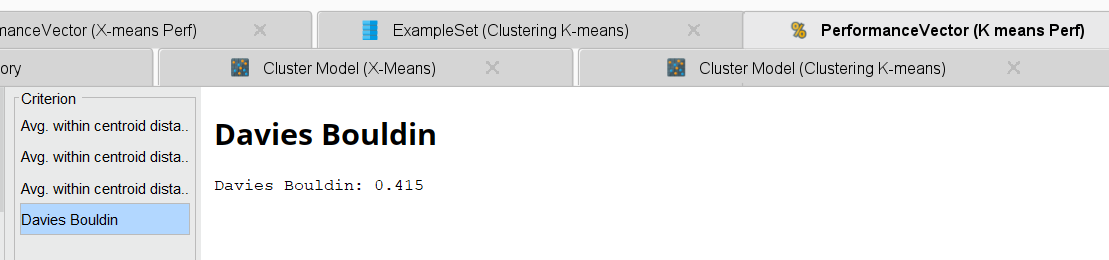
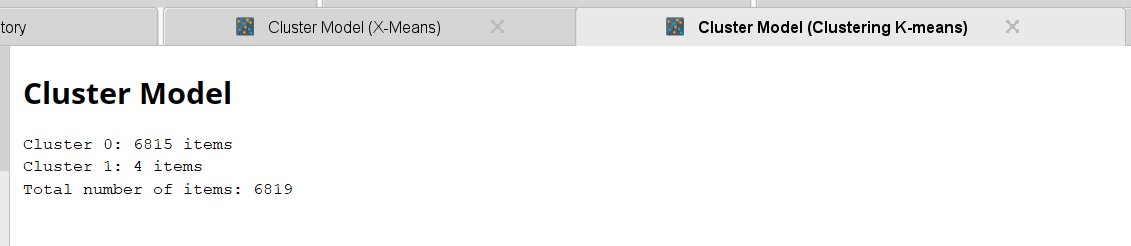
  
x-means:  
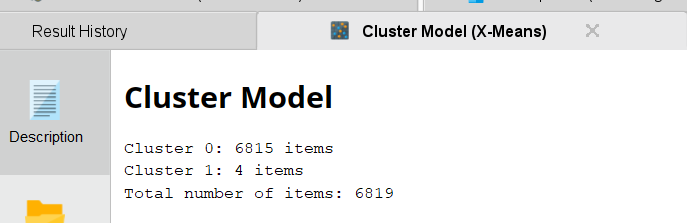
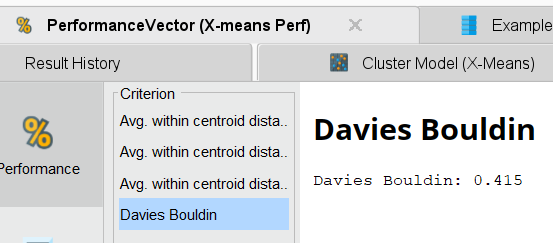

This led to a decrease in the DBI metric (closer to 0 is better), and a marginal increase in clustering effectiveness, but still abysmal overall. Studying the Plot tab I realized that some of the variables were not useful for clustering, at least according to the output. My next step was to adjust the variable subset further based on the results of the last two subsets. 
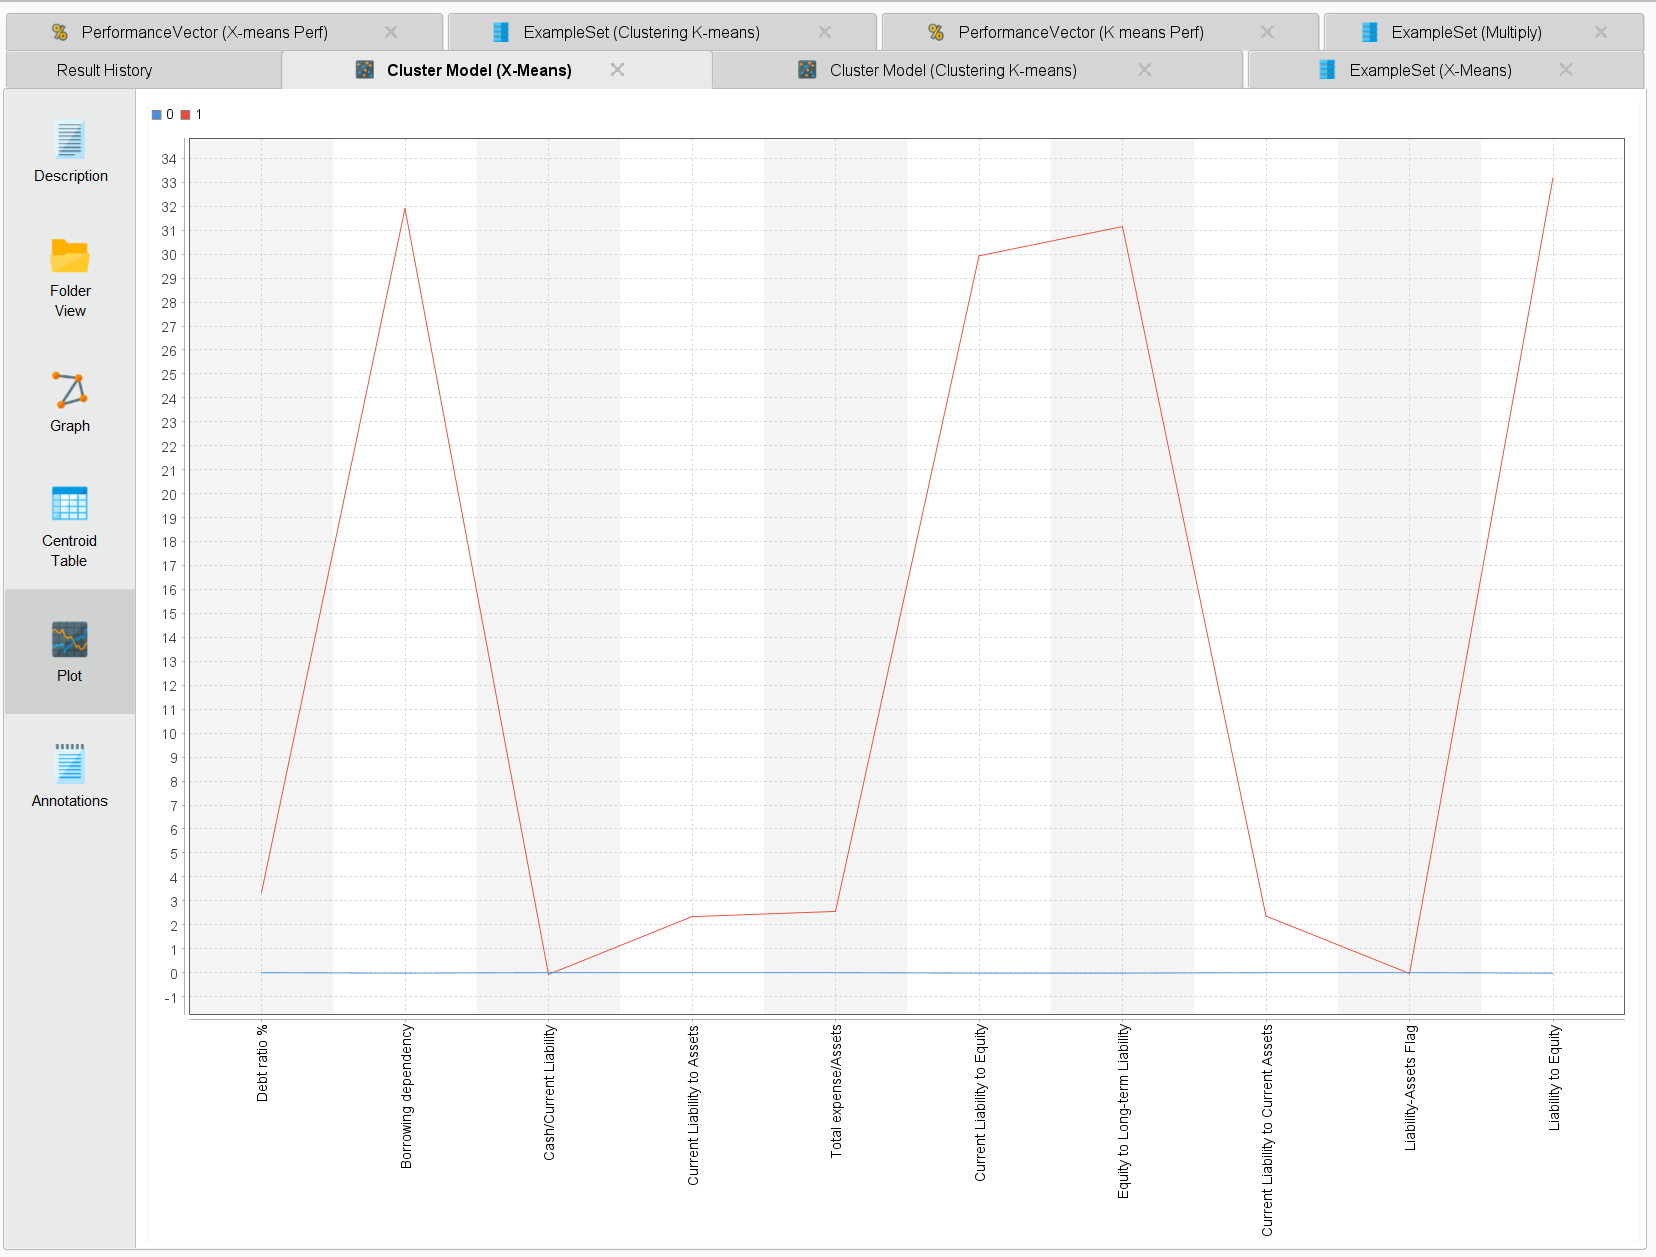

The next run used a subset of data that was an adjusted hybrid of the values from the python and excel results, combined with feature elimination based on the plot view for each run already executed. The results were as follows:  
K-means:  
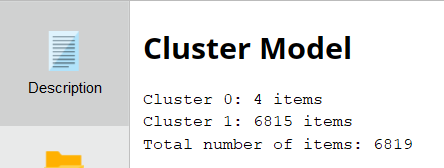
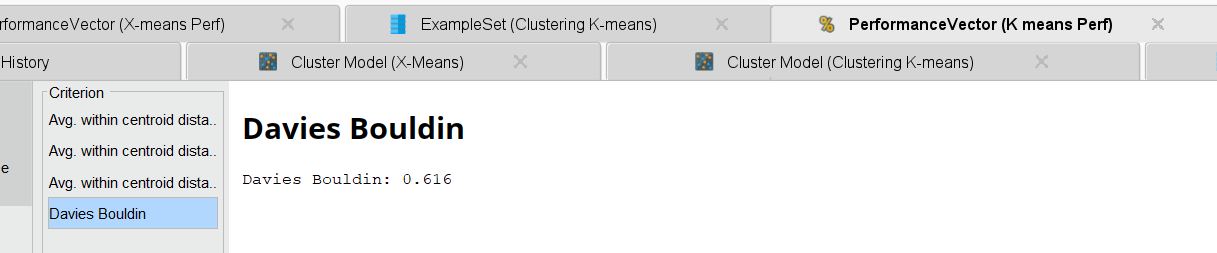  
x-means:  
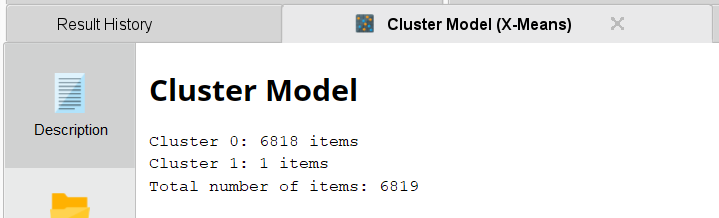
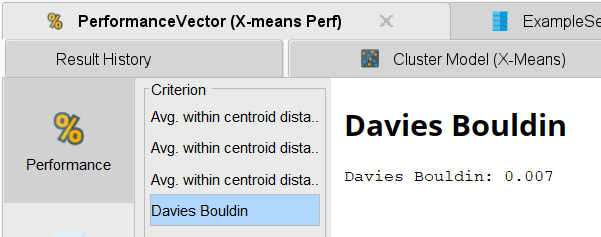  
Plot view:  
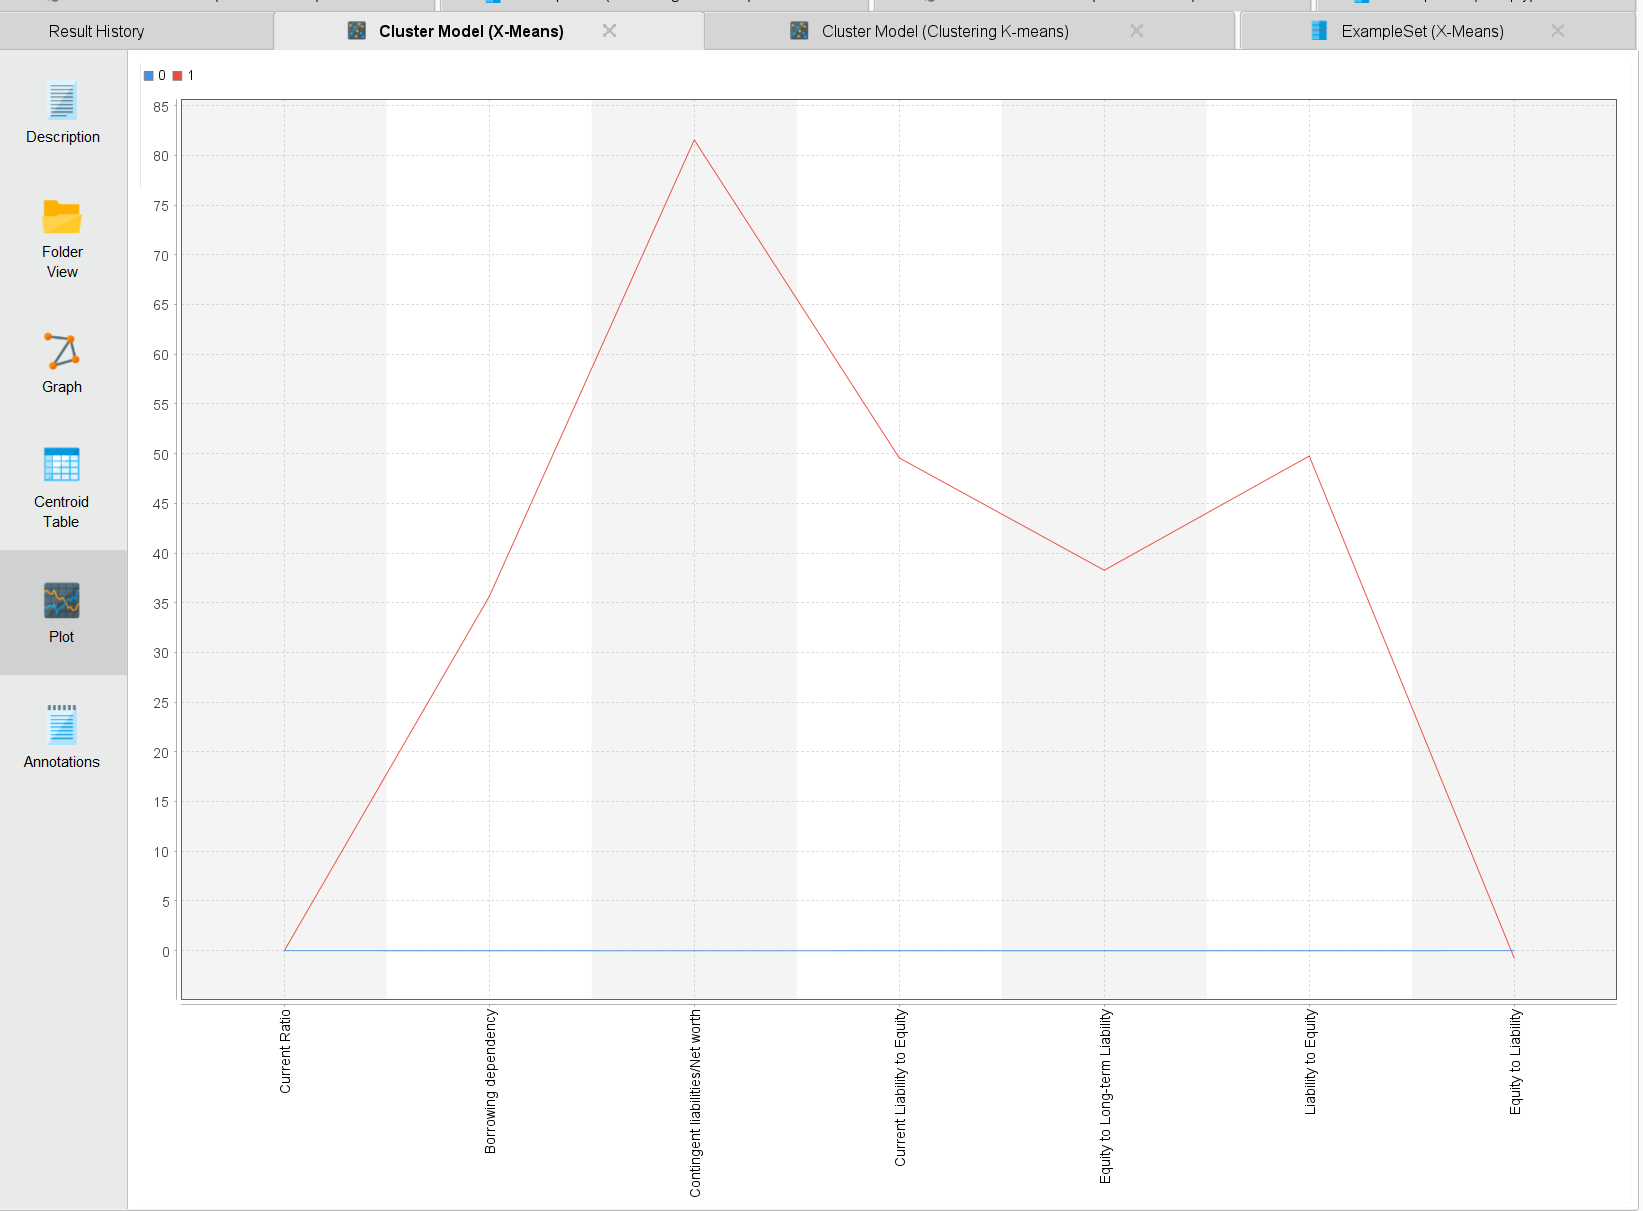

The clustering is still abysmal, but the DBI at 0.007 for x-means is exceptionally low. I confered with my colleagues and ran the example sets that our prof had used in class to ensure that I had not made an error, and our results were as shown in class. This means that the model is functional, but it is doing a very poor job of clustering. 

# Conclusion
I wrote an email to my prof outlining our concerns and asking to review the work for errors we may have missed. He responded saying that the model is useless for clustering but has done an exceptional job minimizing DBI which was the stated goal of the assignment, and that he would have to review this case study and make adjustments for future classes going forwards. 

## Closing thoughts

I think that a classification algorithim would be more appropriate for this kind of problem. We are doing a different case study next week on a different dataset for classification. In creating this writeup and reviewing the python code, I believe there may be errors, or perhaps missing code, as the KNN code seems to be absent completely. Not certain what happened there, but regardless the outputs that I got provided a great baseline for working in AI studio. I also noticed via the plot view that the variables selected were effectively useless for clustering into one of the two groups, despite being very useful for the other which is an interesting note. 

I am happy that I was able to successfuly create an overfit model to achieve the stated objective, and even more happy that I was able to realize that the model in application would not be very useful. This has been a fun and insightful assignment, and I think it does a great job outlining my approach to the problem, which is why I wrote this writeup. 

Thank you for reading. You can find more of my work and contact information at: https://bencooney.carrd.co/ and https://www.linkedin.com/in/cooneyben


